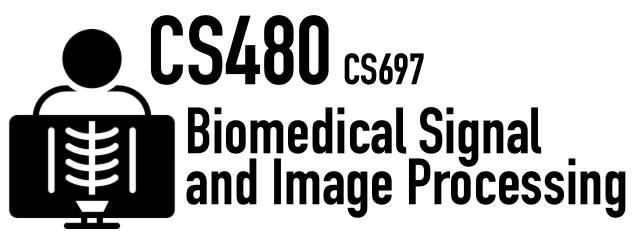

# Assignment 4

**Yiming Shen**

**4/03/2021**

**HW Topic: Random Forest classifier**

**Reference ：**

Course Slides

[Random forest - Wikipedia](https://en.wikipedia.org/wiki/Random_forest#:~:text=Random%20forests%20or%20random%20decision,average%20prediction%20(regression)%20of%20the)

[RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

[Understanding Random Forest](https://towardsdatascience.com/understanding-random-forest-58381e0602d2)

In [1]:
# In this assignment, we will create a Random Forest classifier to detect pneumonia!

In [2]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# we are using mahotas again, so lets install it!
!pip install mahotas

In [4]:
# our imports include sklearn this time
import mahotas as mh
import os
from sklearn.ensemble import RandomForestClassifier

**Task 1:** Download, extract, and load the data! [15 Points]

In [5]:
# Please download this file: https://cs480.org/data/xray.zip
# This is a subset of the Kaggle Pneumonia Dataset!
#
# TODO: Upload xray.zip using the file panel on the left.

In [6]:
# Run this code to extract the zip file and to create
# the folder structure of normal/ and pneumonia/ images.
# Each folder contains the first images of the Kaggle dataset.
import zipfile
with zipfile.ZipFile('xray.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

NORMAL_DIR = 'normal/'
PNEUMONIA_DIR = 'pneumonia/'

In [7]:
# Here we load the first image from the normal dataset.
img = mh.imread(NORMAL_DIR + 'IM-0115-0001.jpeg')

In [8]:
img

array([[ 22,  24,  24, ...,  96,  94,  93],
       [ 23,  24,  24, ...,  97,  94,  92],
       [ 24,  24,  23, ...,  99,  96,  94],
       ...,
       [ 49,  50,  48, ..., 119, 119, 119],
       [ 50,  52,  53, ..., 123, 124, 123],
       [ 52,  53,  54, ..., 129, 128, 127]], dtype=uint8)

In [9]:
# TODO: Please display this image and print the dimensions!

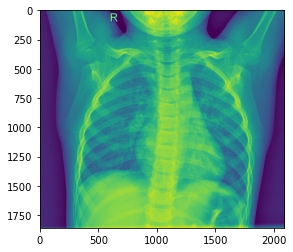

In [10]:
# TODO: YOUR CODE
plt.imshow(img)

In [11]:
#dimensions
img.shape

(1858, 2090)

**Task 2:** Let's do some data wrangling and more visualization! [35 Points]

In [12]:
# This code loads all normal images into a numpy array.
normal_files = os.listdir( NORMAL_DIR )

normal_images = np.zeros( (len(normal_files), 300, 300), dtype=np.float32)

for i in range(len(normal_files)):
  loaded_image = mh.imread( NORMAL_DIR + normal_files[i], as_grey=True )

  loaded_image = mh.imresize( loaded_image, (300, 300) )
  img_shape = loaded_image.shape

  normal_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [13]:
# This code loads all pneumonia images into a numpy array.
pneumonia_files = os.listdir( PNEUMONIA_DIR )

pneumonia_images = np.zeros( (len(pneumonia_files), 300, 300), dtype=np.float32)

for i in range(len(pneumonia_files)):
  loaded_image = mh.imread( PNEUMONIA_DIR + pneumonia_files[i], as_grey=True )
  
  loaded_image = mh.imresize( loaded_image, (300, 300) )
  img_shape = loaded_image.shape

  pneumonia_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [14]:
loaded_image.shape

(300, 300)

### The two code blocks above perform 2 data wrangling operations.
Which ones?

Hint: The first one might be more obvious but the second one happens in the last line of each block.

TODO: Operation 1) YOUR ANSWER
TODO: Operation 2) YOUR ANSWER

**1, Loading the image and convert it into numpy array of float numbers**

**2, Separate 300*300 image into two lists which has 300 rows, 300 columns.**

In [15]:
# Now, let's look at the first 5 normal_images and the first 5 pneumonia_images.
# TODO: Please visualize multiple images at once.
# Hint: You can use one of the following answers from StackOverflow for this:
# https://stackoverflow.com/questions/41210823/using-plt-imshow-to-display-multiple-images

In [16]:
def Image(array, title, n):
  fig=plt.figure(figsize=(25,5))
  fig.suptitle('{} {} images'.format(n,title), fontsize=20)
  columns = n
  rows = 1
  for a in range(1,columns*rows + 1):
    img = array[a]
    fig.add_subplot(rows, columns, a)
    plt.imshow(img)
  plt.show()

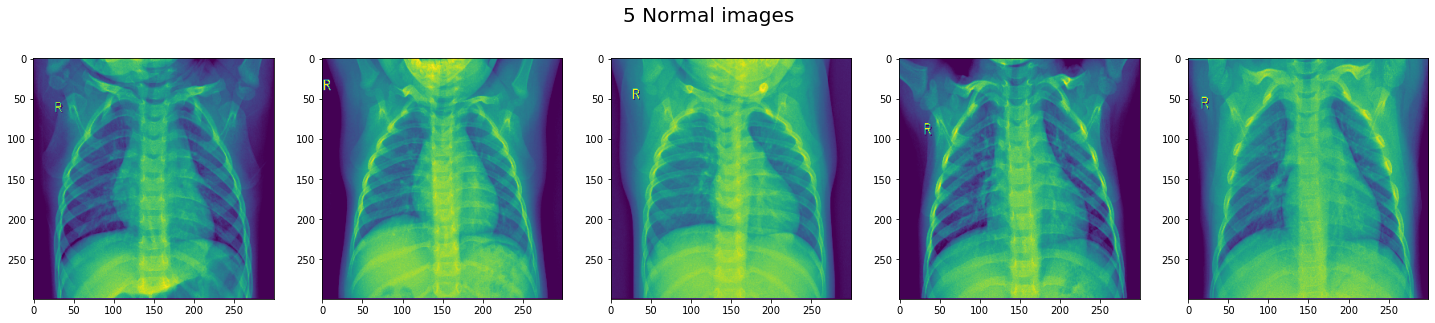

In [17]:
# TODO: YOUR CODE
Image(normal_images, "Normal", 5)

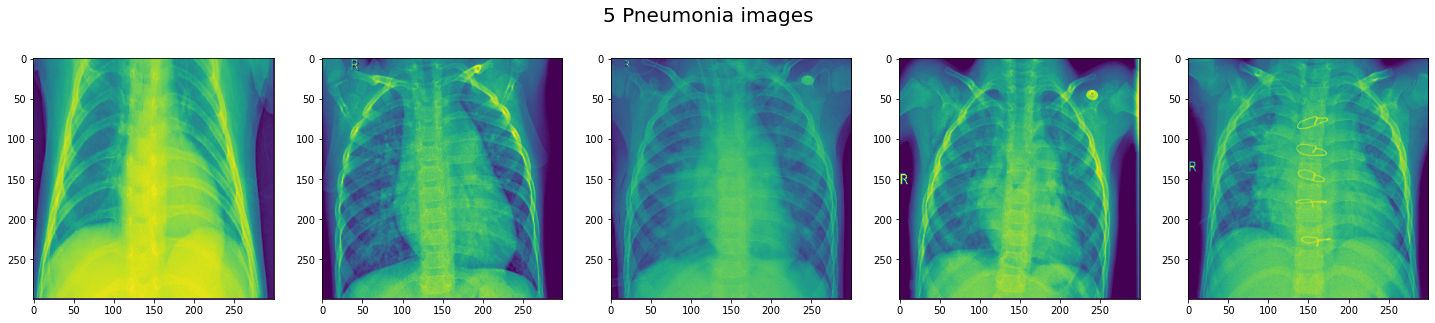

In [18]:
Image(pneumonia_images, "Pneumonia", 5)

**Task 3:** Setup training and testing data. [15 Points]

In [19]:
# Any supervised machine learning algorithm requires disjunct sets of
# training and testing data.
#
# For each, we will create a balanced dataset that includes an equal number
# of normal xrays and pneumonia xrays.
#
# The training data will include 120 images (60 normal, 60 pneumonia).
# The testing data will include the remaining 80 images (40 normal, 40 pneumonia).
#
# Supervised learning means that we tell the algorithm which image is normal
# and which image is pneumonia. For this, we need the training_target vector.
# The vector shall be 0 for a normal image, and 1 for a pneumonia.

In [20]:
TRAINING_COUNT = 60

training_data = np.zeros( (TRAINING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[0:TRAINING_COUNT] ):
  training_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[0:TRAINING_COUNT] ):
  training_data[i + TRAINING_COUNT] = p.ravel()

In [21]:
# TODO: Please create the training_target vector with 0 for a normal image, and
# 1 for a pneumonia.
training_target = list(0 if i < TRAINING_COUNT else 1 for
                       i in range (TRAINING_COUNT *2))

In [22]:
" ".join(str(x) for x in training_target)

'0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1'

In [23]:
TESTING_COUNT = 40

testing_data = np.zeros( (TESTING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i + TESTING_COUNT] = p.ravel()

In [24]:
# TODO: Please create the testing_target vector with 0 for a normal image, and
# 1 for a pneumonia.
testing_target = list(0 if i < TESTING_COUNT else 1
                      for i in range (TESTING_COUNT * 2))

In [25]:
" ".join(str(x) for x in testing_target)

'0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1'

**Task 4:** Let's train and evaluate the Random Forest! [35 Points]

In [26]:
# With scikit-learn, we can easily set up a default Random Forest classifier.
clf = RandomForestClassifier()

In [27]:
# Now, we train the classifier with the training data and the training targets.
# We essentially show the classifier an image and tell whether the image is 
# normal or pneumonia.
fitted = clf.fit( training_data, training_target )

In [28]:
fitted

RandomForestClassifier()

In [29]:
# TODO: In just a few sentences, please explain how the Random Forest works.

Random forest algorithms have three main hyperparameters, which need to be set before training. These include **node size**, **the number of trees**, and **the number of features sampled**. 

**Random Forest algorithm** is a supervised classification algorithm, which is to create a forest by some way and make it random. There is a direct relationship between the number of trees in the forest and the results it can get: the larger the number of trees, the more accurate the result. But one thing to note is that creating the forest is not the same as constructing the decision with information gain or gain index approach. Besides,the classifier of Random Forest can handle missing values, and the last advantage is that the Random Forest classifier can be modeled for categorical values.

[Reference: Wikipedia - Random forest](https://en.wikipedia.org/wiki/Random_forest)

In [30]:
# TODO: YOUR ANSWER

In [31]:
# After training, we can see how well the classifier predicts our testing data.
# The following command will return the classification accuracy.
clf_original = clf.score( testing_data, testing_target )
print("Accuracy: ", clf.score( testing_data, testing_target ))

Accuracy:  0.9375


In [32]:
# TODO: Is the classification accuracy good? And, are you surprised?

In [33]:
# TODO: YOUR ANSWER

The accuracy is above 90% for all the iterations which is acceptable.

**Bonus:** Let's take a closer look! [33 Points]

In [34]:
# Can you figure out which images were misclassified?
# Hint: You can use predictions = clf.predict(testing_data) for this.
# Can you display them?
# Do you have an idea why these images were problematic?

In [35]:
# TODO: YOUR CODE AND YOUR ANSWER

In [36]:
predictions = clf.predict(testing_data) #predictions = clf.predict(testing_data) 
misclassified = predictions == testing_target
misclassified_idx = np.where(misclassified==False)[0]
misclassified_idx

array([ 2,  7, 35, 46, 75], dtype=int64)

In [37]:
images = [testing_data[i] for i in misclassified_idx]
images

[array([23., 19., 23., ...,  0.,  0.,  0.], dtype=float32),
 array([93., 86., 84., ...,  0.,  0.,  0.], dtype=float32),
 array([60., 64., 66., ...,  0.,  0.,  0.], dtype=float32),
 array([85., 90., 98., ...,  0.,  0.,  0.], dtype=float32),
 array([39., 35., 43., ...,  0.,  0.,  0.], dtype=float32)]

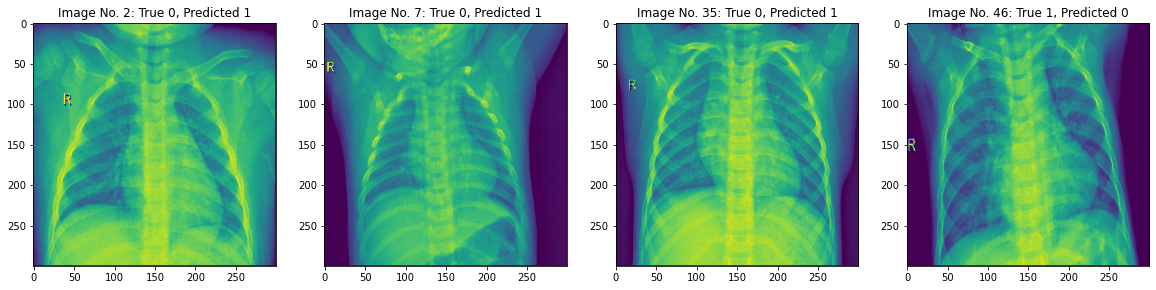

In [38]:
fig=plt.figure(figsize=(20,5*(len(misclassified_idx)//4 + 1)))
columns = 4
rows = len(misclassified_idx)//4 + 1
for i in range(1,columns*rows +1):
  if i < len(images):
    img = np.resize(images[i-1], (300, 300) )
    fig.add_subplot(rows, columns, i).set_title("Image No. {}: True {}, Predicted {}".format(misclassified_idx[i-1],
                                                                                             int(testing_target[misclassified_idx[i-1]]),
                                                                                             int(predictions[misclassified_idx[i-1]])))
    plt.imshow(img)

The images were problematic might be happend, since the tested people was moving.

In [39]:
# TODO: How can we improve the classification performance?
# Hint: Ideas without code are fine as well.

In [40]:
Image_improve = list(range(len(testing_target)))
Image_improve = np.delete(Image_improve,misclassified_idx)
Image_improve

array([ 0,  1,  3,  4,  5,  6,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 76, 77, 78, 79])

In [41]:
def ImageImprove(array, title, n,r):
    fig=plt.figure(figsize=(20,20))
    fig.suptitle('{} {} images'.format(n,title), fontsize=20)
    columns = n
    rows = n
    if(r ==1):
        for i in range(1,columns*rows +1):
            img = np.resize( testing_data[array[i-1]], (300, 300) )
            fig.add_subplot(rows, columns, i).set_title("Image {}: True {}, Predicted {}".format(array[i-1],
                                                                                             int(testing_target[array[i-1]]),
                                                                                             int(predictions[array[i-1]])))
            plt.imshow(img)
    else:
        for i in range(1,columns*rows +1):
            img = np.resize( testing_data[array[-1*i]], (300, 300) )
            fig.add_subplot(rows, columns, i).set_title("Image {}: True {}, Predicted {}".format(array[-1*i],
                                                                                             int(testing_target[array[-1*i]]),
                                                                                             int(predictions[array[-1*i]])))
            plt.imshow(img)
    plt.show()

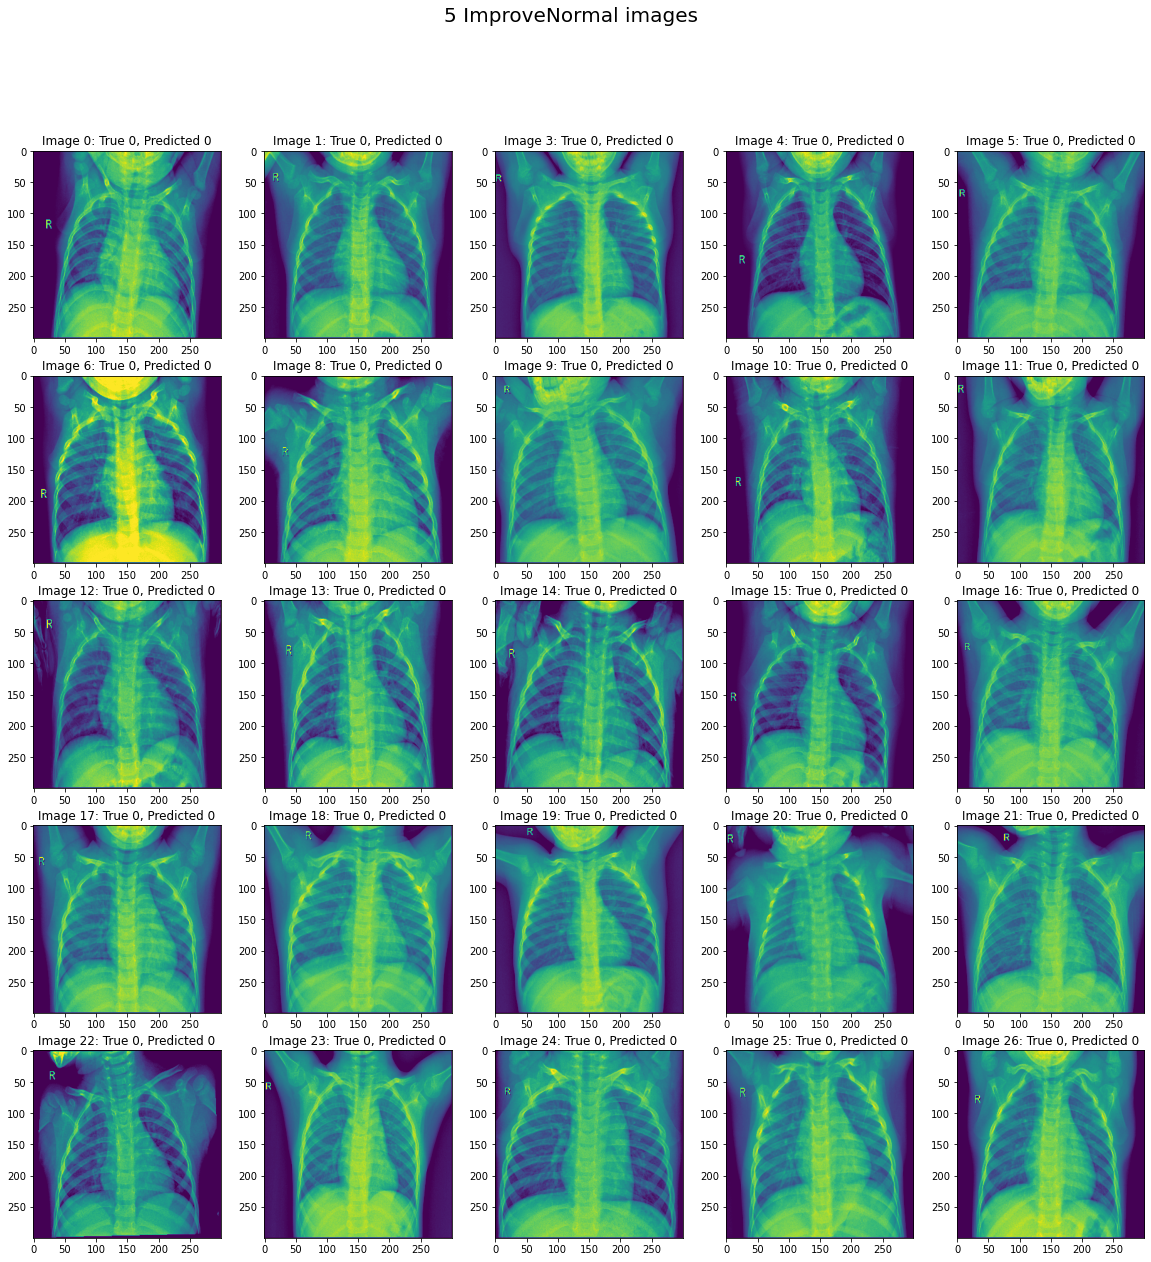

In [42]:
ImageImprove(Image_improve, "ImproveNormal", 5,1)

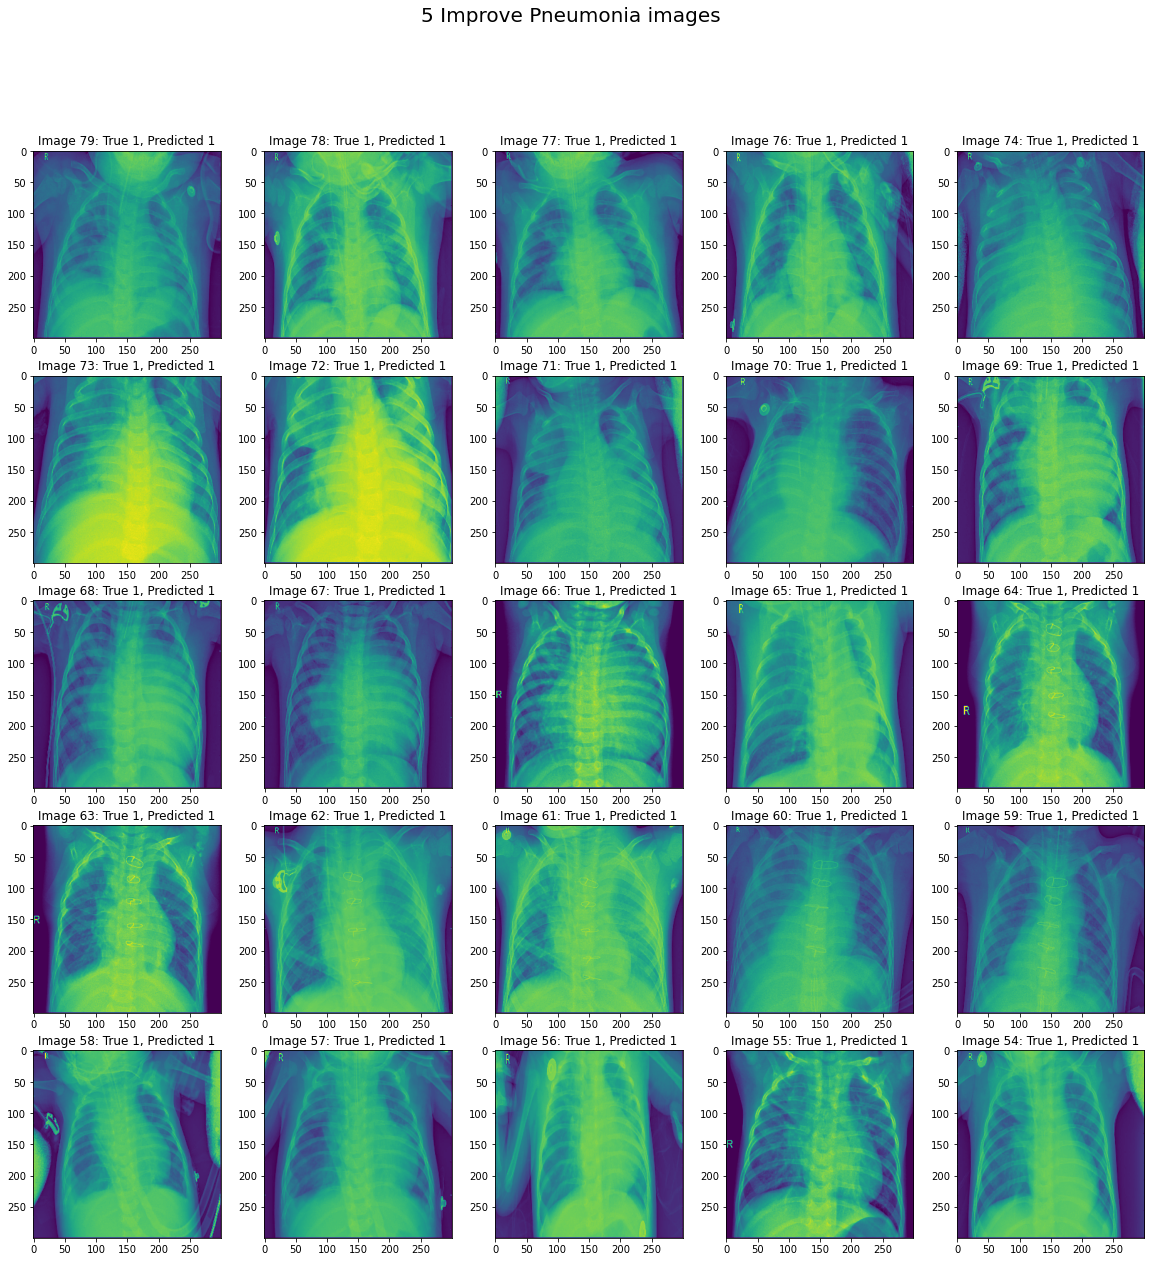

In [43]:
ImageImprove(Image_improve, "Improve Pneumonia", 5, 2)

In [44]:
# TODO: YOUR ANSWER

[RandomForestClassifier handbook](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [45]:
clf_1000 = RandomForestClassifier(n_estimators=1000) #n_estimatorsint, default=100
fitted = clf_1000.fit( training_data, training_target )
clf2  = clf_1000.score( testing_data, testing_target )
print("New_Accuracy: ", clf_1000.score( testing_data, testing_target ))

New_Accuracy:  0.925


In [46]:
print("The accuracy error between old and new: ", clf_original -  clf2)

The accuracy error between old and new:  0.012499999999999956


In [47]:
clf_1000_entropy = RandomForestClassifier(n_estimators=1000,criterion="entropy") #n_estimatorsint, default=100
fitted = clf_1000_entropy.fit( training_data, training_target )
clf3  = clf_1000_entropy.score( testing_data, testing_target )

print("New_Accuracy_1000_entropy: ", clf_1000_entropy.score( testing_data, testing_target ))

New_Accuracy_1000_entropy:  0.9125


In [48]:
print("The accuracy error between old and new: ", clf_original -  clf3)

The accuracy error between old and new:  0.025000000000000022


The model is become better.

In [49]:
# Great job!!!
#           ___
#       _.-'   \
#      /        \
#     /          \
#    /            `.___
#   ( .--.)\/(,.--.    `-.
#   ,',-. \   / ,-.`.     )
#  ( /   \     /   \ )   / \
#   || .-|     |-. ||---'|  \
#  _|| | |     | | ||_   |   \
# /. \ |_|.---.|_| / ,\  | .^.\
# `.\ `--"     "--' /,'  |/
#   `>  _________ <'
# ,-' ,---.---.---. `-.
# `--'\    \j/    /`--'
#    `.\         /,'
#      \\_______//
#       `-------'       hjw